### WORD MOVER DISTANCE BETWEEN DIFFERENT SAMPLES

In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from gensim.models import KeyedVectors

word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

#### Intermediate Texts

In [2]:
my_intermediate = []
f = open('Intermediate_100.txt','r')

for line in f:
    my_intermediate.append(line.strip())

In [3]:
len(my_intermediate)

100

In [4]:
int_tokenized = []
for sentence in my_intermediate:
    sentence = sentence.lower().split()
    int_tokenized.append(sentence)

In [5]:
from nltk.corpus import stopwords

# Removing stop words
stop_words = stopwords.words('english')
int_tokenized_new = []
for line in int_tokenized:
    line = [w for w in line if w not in stop_words]
    int_tokenized_new.append(line)

In [7]:
int_score = []
for i in range(0,len(int_tokenized_new)-1):
    distance = word2vec.wmdistance(int_tokenized_new[i], int_tokenized_new[i+1])
    int_score.append(distance)
    #print(f'Distance between sentence {i+1} and sentence {i+2} is: {distance}')

Text(0, 0.5, 'Density')

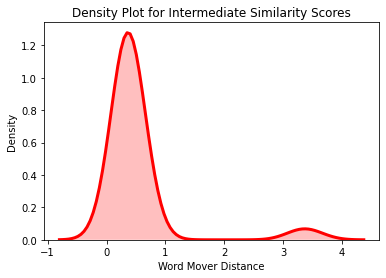

In [8]:
# Density Plot and Histogram of all intermediate scores
sns.distplot(int_score, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.05, 1.2),ylim=(0, 18))
plt.title('Density Plot for Intermediate Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

#### Benign Texts

In [9]:
my_benign = []
f = open('Benign_100.txt','r')

for line in f:
    my_benign.append(line.strip())
len(my_benign)

100

In [10]:
ben_tokenized = []
for sentence in my_benign:
    sentence = sentence.lower().split()
    ben_tokenized.append(sentence)

In [11]:
ben_tokenized_new = []
for line in ben_tokenized:
    line = [w for w in line if w not in stop_words]
    ben_tokenized_new.append(line)

In [12]:
len(ben_tokenized_new)

100

In [13]:
ben_score = []
for i in range(0,len(ben_tokenized_new)-1):
    distance = word2vec.wmdistance(ben_tokenized_new[i], ben_tokenized_new[i+1])
    ben_score.append(distance)
    #print(f'Distance between sentence {i+1} and sentence {i+2} is: {distance}')

Text(0, 0.5, 'Density')

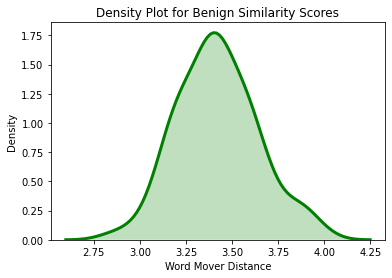

In [14]:
# Density Plot and Histogram of all benign scores
sns.distplot(ben_score, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.05, 1.2),ylim=(0, 18))
plt.title('Density Plot for Benign Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

#### Side by side comparison of Intermediate and Benign PDFs

Text(0, 0.5, 'Density')

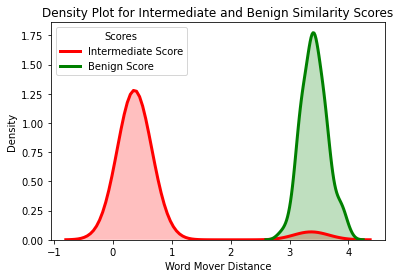

In [15]:
plot_these = [int_score, ben_score]
label_name = ["Intermediate Score", "Benign Score"]
plot_color = [ "red","green"]

for i in range(len(plot_these)):
    subset = plot_these[i]
# Draw the density plot 

    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = label_name[i], color = plot_color[i])#.set(xlim=(-0.05, 1),ylim=(0, 40))
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Scores')
plt.title('Density Plot for Intermediate and Benign Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

#### 50 Benign and 50 Intermediate Texts

In [16]:
my_mix = []
f = open('50_ben_50_int.txt','r')

for line in f:
    my_mix.append(line.strip())
len(my_mix)

100

In [17]:
mix_tokenized = []
for sentence in my_mix:
    sentence = sentence.lower().split()
    mix_tokenized.append(sentence)

In [18]:
mix_tokenized_new = []
for line in mix_tokenized:
    line = [w for w in line if w not in stop_words]
    mix_tokenized_new.append(line)

In [19]:
mix_score = []
for i in range(0,len(mix_tokenized_new)-1):
    distance = word2vec.wmdistance(mix_tokenized_new[i], mix_tokenized_new[i+1])
    mix_score.append(distance)
    #print(f'Distance between sentence {i+1} and sentence {i+2} is: {distance}')

Text(0, 0.5, 'Density')

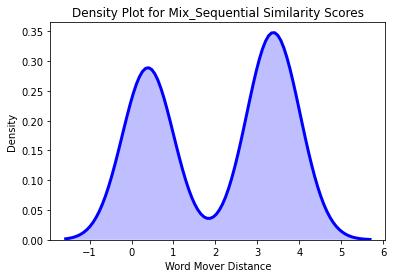

In [33]:
# Density Plot and Histogram of all benign scores
sns.distplot(mix_score, hist=False, kde=True, 
             bins=int(180/5), color = 'blue', 
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.05, 1.2),ylim=(0, 18))
plt.title('Density Plot for Mix_Sequential Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

#### Shuffled Benign and Intermediate Texts

In [85]:
import random
my_shuffle_mix = my_mix.copy()
random.shuffle(my_shuffle_mix)
#my_shuffle_mix

In [86]:
mix_shuffle_tokenized = []
for sentence in my_shuffle_mix:
    sentence = sentence.lower().split()
    mix_shuffle_tokenized.append(sentence)

In [87]:
mix_shuffle_tokenized_new = []
for line in mix_shuffle_tokenized:
    line = [w for w in line if w not in stop_words]
    mix_shuffle_tokenized_new.append(line)

In [88]:
mix_shuffle_score = []
for i in range(0,len(mix_shuffle_tokenized_new)-1):
    distance = word2vec.wmdistance(mix_shuffle_tokenized_new[i], mix_shuffle_tokenized_new[i+1])
    mix_shuffle_score.append(distance)
    #print(f'Distance between sentence {i+1} and sentence {i+2} is: {distance}')

Text(0, 0.5, 'Density')

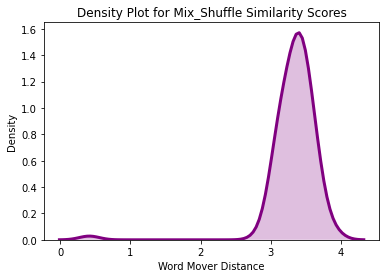

In [89]:
# Density Plot and Histogram of all benign scores
sns.distplot(mix_shuffle_score, hist=False, kde=True, 
             bins=int(180/5), color = 'purple', 
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.05, 1.2),ylim=(0, 18))
plt.title('Density Plot for Mix_Shuffle Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

#### Intermediate Texts Shuffled

In [71]:
int_shuffle = my_intermediate.copy()
random.shuffle(int_shuffle)
#my_intermediate_shuffle

In [72]:
int_shuffle_tokenized = []
for sentence in int_shuffle:
    sentence = sentence.lower().split()
    int_shuffle_tokenized.append(sentence)
#my_intermediate_shuffle_tokenized

In [73]:
int_shuffle_tokenized_new = []
for line in int_shuffle_tokenized:
    line = [w for w in line if w not in stop_words]
    int_shuffle_tokenized_new.append(line)
#my_intermediate_shuffle_tokenized_new

In [74]:
int_shuffle_score = []
for i in range(0,len(int_shuffle_tokenized_new)-1):
    distance = word2vec.wmdistance(int_shuffle_tokenized_new[i], int_shuffle_tokenized_new[i+1])
    int_shuffle_score.append(distance)
    #print(f'Distance between sentence {i+1} and sentence {i+2} is: {distance}')

Text(0, 0.5, 'Density')

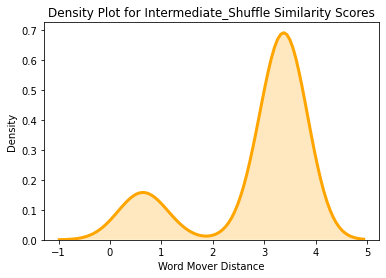

In [75]:
# Density Plot and Histogram of all benign scores
sns.distplot(int_shuffle_score, hist=False, kde=True, 
             bins=int(180/5), color = 'orange', 
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.05, 1.2),ylim=(0, 18))
plt.title('Density Plot for Intermediate_Shuffle Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

### Normalizing Distance Values

#### Intermediate Texts (distance normalized)

In [21]:
#NORMALIZE SCORES

for i, val in enumerate(int_score):
    int_score[i] = (val-min(int_score)) / (max(int_score)-min(int_score))
#int_score

Text(0, 0.5, 'Density')

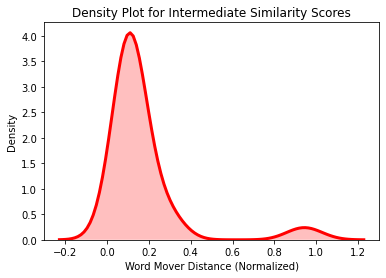

In [22]:
# Density Plot and Histogram of all NORMALIZED intermediate scores 
sns.distplot(int_score, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.05, 1.2),ylim=(0, 18))
plt.title('Density Plot for Intermediate Similarity Scores')
plt.xlabel('Word Mover Distance (Normalized)')
plt.ylabel('Density')

#### Benign Texts (distance normalized)

In [23]:
for i, val in enumerate(ben_score):
    ben_score[i] = (val-min(ben_score)) / (max(ben_score)-min(ben_score))
#ben_score

Text(0, 0.5, 'Density')

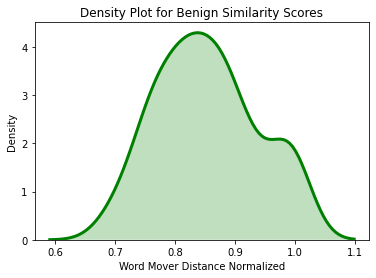

In [24]:
# Density Plot and Histogram of all normalized benign scores
sns.distplot(ben_score, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.05, 1.2),ylim=(0, 18))
plt.title('Density Plot for Benign Similarity Scores')
plt.xlabel('Word Mover Distance Normalized')
plt.ylabel('Density')

#### Side by side comparison of intermediate and benign texts (normalized)

Text(0, 0.5, 'Density')

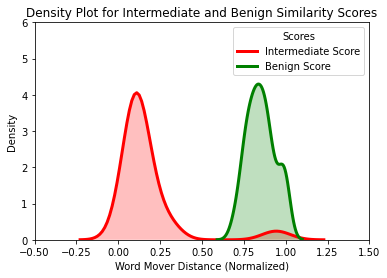

In [78]:
#NORMALIZED SCORES
plot_these = [int_score, ben_score]
label_name = ["Intermediate Score", "Benign Score"]
plot_color = [ "red","green"]

for i in range(len(plot_these)):
    subset = plot_these[i]
# Draw the density plot 

    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = label_name[i], color = plot_color[i]).set(xlim=(-0.5, 1.5),ylim=(0, 6))
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Scores')
plt.title('Density Plot for Intermediate and Benign Similarity Scores')
plt.xlabel('Word Mover Distance (Normalized)')
plt.ylabel('Density')

#### 50 Benign and 50 Intermediate (Sequential)

In [38]:
for i, val in enumerate(mix_score):
    mix_score[i] = (val-min(mix_score)) / (max(mix_score)-min(mix_score))
#ben_score

Text(0, 0.5, 'Density')

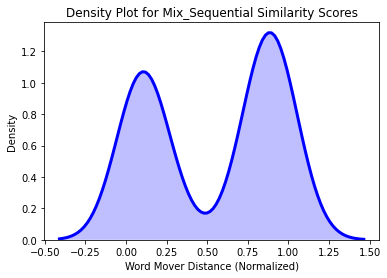

In [39]:
# Density Plot and Histogram of all normalized benign scores
sns.distplot(mix_score, hist=False, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.05, 1.2),ylim=(0, 18))
plt.title('Density Plot for Mix_Sequential Similarity Scores')
plt.xlabel('Word Mover Distance (Normalized)')
plt.ylabel('Density')

#### 50 Benign and 50 Intermediate Shuffled (distance normalized)

In [90]:
for i, val in enumerate(mix_shuffle_score):
    mix_shuffle_score[i] = (val-min(mix_shuffle_score)) / (max(mix_shuffle_score)-min(mix_shuffle_score))
#ben_score

Text(0, 0.5, 'Density')

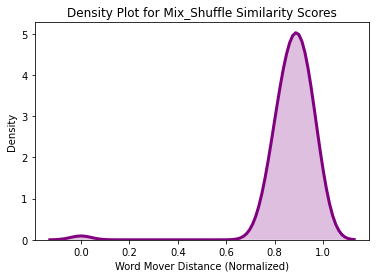

In [91]:
# Density Plot and Histogram of all normalized benign scores
sns.distplot(mix_shuffle_score, hist=False, kde=True, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.05, 1.2),ylim=(0, 18))
plt.title('Density Plot for Mix_Shuffle Similarity Scores')
plt.xlabel('Word Mover Distance (Normalized)')
plt.ylabel('Density')

In [43]:
min(mix_shuffle_score)

0.006227736426896618

#### Intermediate Texts shuffled (distance normalized)

In [76]:
for i, val in enumerate(int_shuffle_score):
    int_shuffle_score[i] = (val-min(int_shuffle_score)) / (max(int_shuffle_score)-min(int_shuffle_score))
#ben_score

Text(0, 0.5, 'Density')

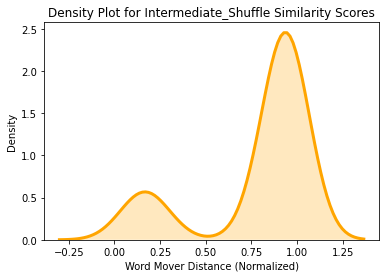

In [79]:
# Density Plot and Histogram of all normalized benign scores
sns.distplot(int_shuffle_score, hist=False, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.05, 1.2),ylim=(0, 18))
plt.title('Density Plot for Intermediate_Shuffle Similarity Scores')
plt.xlabel('Word Mover Distance (Normalized)')
plt.ylabel('Density')